<a href="https://colab.research.google.com/github/sivasaiyadav8143/Machine-Learning-with-Python/blob/master/Linear_Regression_from_scratch.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import matplotlib.pyplot as plt

def model_linear(x,w): # Model
    f = w[1]*x + w[0] # Linear predictor
    return f

def loss_MSE(f,y):
    loss = np.sum(np.square(y-f)) / np.size(f)
    return loss

def loss_MAE(f,y):
    loss = np.sum(np.abs(y-f)) / np.size(f)
    return loss

Text(0, 0.5, 'f(x) and y')

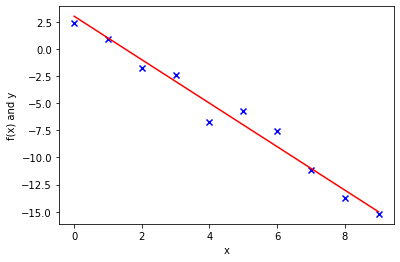

In [2]:
x = np.array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9]) # Inputs
w_ideal = np.array([3, -2]) # Actual weights
y = w_ideal[1]*x + w_ideal[0] + 0.9*np.random.randn(np.size(x)) # Adding some noise to desired output

# TRY THE IDEAL WEIGHTS AND PLOT DATA
w = w_ideal # Some estimated weights.
f = model_linear(x,w) # Model

# Plot data
plt.scatter(x, y, c="b", marker='x')
plt.plot(x, f, c="r")
plt.xlabel("x")
plt.ylabel("f(x) and y")

In [3]:
# CHECK THE LOSS WITH IDEAL WEIGHTS. IT SHOULD BE LOW, IF THE NOISE IS LOW.

loss = loss_MSE(f,y)

print(loss)

0.879118920600942


In [4]:
# NOW DEVIATE FROM THE IDEAL WEIGHTS. LOSS SHOULD INCREASE.

w = np.array([3.5, -1.9]) # Some estimated weights.
f = model_linear(x,w) # Model 
loss = loss_MSE(f,y)

print(loss)


1.9937827136796904


In [5]:
# TRY VERY DIFFERENT WEIGHTS. LOSS SHOULD BE LARGE.
w = np.array([32, 2.1]) # Some estimated weights.
f = model_linear(x,w) # Model 
loss = loss_MSE(f,y)

print(loss)

2398.2724333040687


In [6]:
# ADD AN OUTLIER AND CHECK MSE LOSS WITH IDEAL WEIGHTS. 
x = np.append(x,[10])
y = np.append(y,[108])

w = w_ideal # Some estimated weights.
f = model_linear(x,w) # Model

loss = loss_MSE(f,y)

print(loss)

1421.2537444732736


In [7]:
# TRY MAE LOSS, WHICH SHOULD BE MUCH SMALLER
loss = loss_MAE(f,y)

print(loss)

12.06336571183461


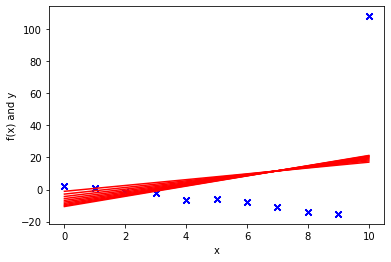

In [8]:
# Perform Gradient Descent on MSE loss

# DEFINE GRADIENT

def grad2(w, x, y):
    x1 = np.vstack((x, np.ones_like(x)))
    f = w.dot(x1).flatten()
    error = (y.flatten() - f)
    gradient = -(1.0/len(x)) * x1.dot(error)
    return gradient, f


# GRADIENT DESCENT

w = np.array([10, 2.1]) # Some estimated weights.
learning_rate = 0.0005
min_abs_change = 1e-5
max_iter = 10000

iterations = 1
while True:
    gradient, f = grad2(w, x, y)
    w_new = w - learning_rate * gradient
    
    # Stopping Condition
    if np.sum(abs(w_new - w)) < min_abs_change:
        break
    if iterations > max_iter:
        break
    
    if iterations % (max_iter/10) == 0:
        # Plot data
        plt.scatter(x, y, c="b", marker='x')
        plt.plot(x, f, c="r")
        plt.xlabel("x")
        plt.ylabel("f(x) and y")
    
    iterations += 1
    w = w_new

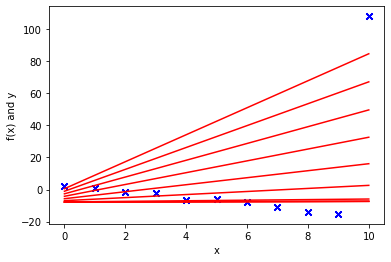

In [9]:
# Perform gradient descent on MAE loss

def grad1(w, x, y):
    x1 = np.vstack((x, np.ones_like(x)))
    f = w.dot(x1).flatten()    
    error = (y.flatten() - f)
    gradient = -(1.0/len(x)) * x.dot(np.sign(error))
    return gradient, f


# GRADIENT DESCENT

w = np.array([10, 2.1]) # Some estimated weights.
learning_rate = 0.0005
min_abs_change = 1e-5
max_iter = 10000

iterations = 1
while True:
    gradient, f = grad1(w, x, y)
    w_new = w - learning_rate * gradient
    
    # Stopping Condition
    if np.sum(abs(w_new - w)) < min_abs_change:
        break
    if iterations > max_iter:
        break
    
    if iterations % (max_iter/10) == 0:
        # Plot data
        plt.scatter(x, y, c="b", marker='x')
        plt.plot(x, f, c="r")
        plt.xlabel("x")
        plt.ylabel("f(x) and y")
    
    iterations += 1
    w = w_new

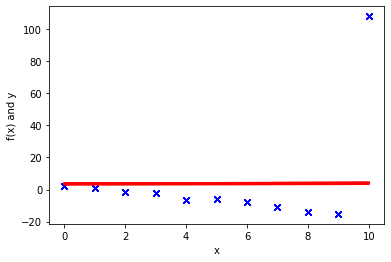

In [10]:
# Perform L2 regularized L2 loss (MSE) gradient descent

def grad2L2(w, x, y, l):
    x1 = np.vstack((x, np.ones_like(x)))
    f = w.dot(x1).flatten()
    error = (y.flatten() - f)
    gradient = -(1.0/len(x)) * x1.dot(error) +  l * np.hstack((w[0,],np.zeros_like(w[1])))
    return gradient, f


# GRADIENT DESCENT

w = np.array([10, 2.1]) # Some estimated weights.
learning_rate = 0.0005
min_abs_change = 1e-5
max_iter = 10000
l = 1000

iterations = 1
while True:
    gradient, f = grad2L2(w, x, y, l)
    w_new = w - learning_rate * gradient
    
    # Stopping Condition
    if np.sum(abs(w_new - w)) < min_abs_change:
        break
    if iterations > max_iter:
        break
    
    if iterations % (max_iter/10) == 0:
        # Plot data
        plt.scatter(x, y, c="b", marker='x')
        plt.plot(x, f, c="r")
        plt.xlabel("x")
        plt.ylabel("f(x) and y")
    
    iterations += 1
    w = w_new